# **Introduction**

ANOVA (Analysis of Variance) is a statistical technique that is used to check if the means of two or more groups are significantly different from each other. ANOVA test is a way to find out if survey or experiment results are significant and the impact of one or more factors by comparing the means of different samples. In other words, they help you to figure out if you need to reject the null hypothesis (H0) or accept the alternate hypothesis (H1). Using Customer Personality Analysis dataset from [kaggle](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis?resource=download). We will do hypothesis testing to prove whether people Education has an effect on people Income or not.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

# **Data Preparation**

In [ ]:
# Load dataset
df = pd.read_csv('marketing_campaign.csv', sep = '\t')

In [ ]:
# Select required columns
df = df[['Education','Income']]
df.sample(3)

,Education,Income
690,PhD,50611.0
2095,PhD,48699.0
1247,Graduation,40521.0


In [ ]:
# Check missing value
df.isna().sum()

Education     0
Income       24
dtype: int64

In [ ]:
# Check missing value ratio
df.isna().sum() * 100 / len(df)

Education    0.000000
Income       1.071429
dtype: float64

Since the missing value proportion is small (below than 5%), we will simply drop it.

In [ ]:
# drop missing value
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Education  2216 non-null   object 
 1   Income     2216 non-null   float64
dtypes: float64(1), object(1)
memory usage: 51.9+ KB


Missing value already dropped.

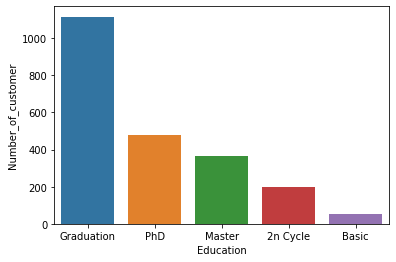

In [ ]:
# Check value based on Education type
count_education = df['Education'].value_counts().reset_index()
count_education.columns = ['Education','Number_of_customer']
sns.barplot(x=count_education['Education'],y=count_education['Number_of_customer'])
plt.show()

Based on graph, Majority customer have Graduation education level. We can order the education type in our dataset from lowest to highest level are Basic, 2n Cycle, Graduation, Master, and PhD.

# **ANOVA Test**

We will prove whether education has an effect on income or not. we make the following hypothesis:

> Is the average income between each type of education significantly different? (criteria alpha = 0.05)
- H0 = Education has the same average income (Education level of someone has not effect to average Income)
- H1 = Education has a significantly different average income (Education level of someone has effect to average Income)

In [ ]:
# Separate the data by type of Education
df2nCycle = df[df['Education'] == '2n Cycle']
dfBasic = df[df['Education'] == 'Basic']
dfGraduation = df[df['Education'] == 'Graduation']
dfMaster = df[df['Education'] == 'Master']
dfPhD = df[df['Education'] == 'PhD']

In [ ]:
# ANOVA test to get P-Value
anova_test = st.f_oneway(df2nCycle['Income'],
dfBasic['Income'],
dfGraduation['Income'],
dfMaster['Income'],
dfPhD['Income'])

In [ ]:
# Check P-Value from ANOVA test
p_value = anova_test.pvalue
print('P-Value is', p_value)

P-Value is 1.6677281316366318e-22


In [ ]:
# Criteria Alpha
Alpha = 0.05

In [ ]:
# ANOVA Test result
if p_value > Alpha:
  print('Based on p-value from ANOVA test, Education has the same average income (Education level of someone has not effect to average Income)')
else:
  print('Based on p-value from ANOVA test, Education has a significantly different average income (Education level of someone has effect to average Income)')

Based on p-value from ANOVA test, Education has a significantly different average income (Education level of someone has effect to average Income)


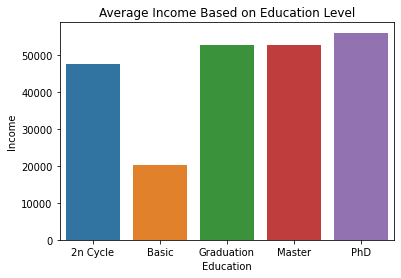

In [ ]:
# Final conclusion based on average income in each education type
bo_mean = df.groupby(['Education']).mean().reset_index()
bar_mean = sns.barplot(x=bo_mean['Education'],y=bo_mean['Income'])
bar_mean.set(title = "Average Income Based on Education Level")
plt.show(bar_mean)

Based on ANOVA test, we accept the H1 that education has a significantly different average income, with the higher the level of education, the higher the average income of a person.

# **Conclusion**

If we want to determine whether multiple groups differ from one another in a measurement, we could use an ANOVA test. Of course, we could use t-test to determine this, but that would require many tests. The more tests we conduct, the bigger the risk is that we come to a false conclusion. By using ANOVA, instead of looking at each individual difference, ANOVA examines the ratio of variance between groups and the variance within groups to determine whether the ratio is big enough to be statistically significant.